This is the clean notebook for week 2 of our project.

The set-up of the notebook is as followed:
1. Load the data
2. Split the data between train and test
3. Scale the data
4. Implement SMOTE 
5. Create an evaluation function.
6. Altman Z-score
7. Ohlsen O-score
8. Logistic Regression (with and without SMOTE)
9. RandomForest (with and without SMOTE)
10. XGBoost (with and without SMOTE)
11. Feature Importance
12. SHAP*
13. Compare Models
14. Conlusion

### 1. Load data

We load the cleaned and winsorized data of year 5. We have chosen this year since the bankruptcy gets closer, so the financial signals are stronger.

In [21]:
import numpy as np

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/Vincent2308/Corporate-Bankruptcy/refs/heads/main/data/clean/polish/polish_bankruptcy_year5_winsorized.csv"
df = pd.read_csv(url)
df.head()

,net_profit_to_total_assets,total_liabilities_to_total_assets,working_capital_to_total_assets,current_assets_to_shortterm_liabilities,cash_flow_to_operating_expenses,retained_earnings_to_total_assets,ebit_to_total_assets,equity_to_total_liabilities,sales_to_total_assets,equity_to_total_assets,...,sales_minus_cogs_to_sales,current_minus_inventory_minus_stli_to_salesminusprofitminusdep,total_costs_to_total_sales,longterm_liabilities_to_equity,sales_to_inventory,sales_to_receivables,shortterm_liabilities_to_sales_days,sales_to_shortterm_liabilities,sales_to_fixed_assets,bankrupt
0,0.088238,0.55472,0.01134,1.0205,-66.520,0.34204,0.109490,0.57752,1.0881,0.32036,...,0.080955,0.275430,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.25970,0
1,0.048179,0.55041,0.10765,1.2437,-22.959,0.00000,0.059280,0.81682,1.5150,0.44959,...,0.240400,0.107160,0.77048,0.139380,10.1180,4.0950,106.430,3.4294,3.36220,0
2,0.099486,0.59991,0.37489,1.6529,19.036,0.21084,0.123950,0.66690,1.0972,0.40009,...,0.088581,0.248660,0.91142,0.064344,5.4655,2.4784,130.020,2.8072,31.64500,0
3,0.078518,0.20546,0.10393,2.7939,77.784,0.36515,0.093388,3.86720,1.2322,0.79454,...,0.188420,0.098822,0.81158,0.185660,11.3790,3.1692,53.575,6.8129,0.47096,0
4,0.125040,0.35440,0.31419,2.7127,17.942,0.30575,0.158430,1.82170,1.2362,0.64560,...,0.191090,0.193680,0.80891,0.264790,4.7737,5.7479,59.841,6.0995,2.22740,0


### 2. Train test split
It is used to measure how well a ML model will perform when it sees new, unseen data. It prevents the model memorizing the data, and provides more realistic estimations. 
- The data is split into two parts: test and train. A common split rate is 20% test and 80% train.
- The model learns to make predictions based on the train data set.
- After which it is tested with the unseen test data.

References:
- https://builtin.com/data-science/train-test-split
- https://www.youtube.com/watch?v=4YAq-vCDnKk

Documentation:
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [2]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=["bankrupt"])
y = df['bankrupt']

x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = 0.2, stratify =y, random_state = 42)

### 3. Scaling
We scaled the data since some of the ratios were small eg. 0,1,2. But other were 60,70 which can lead to some problems for ML model if ratios have different ranges.

We only scale X since Y is the target variable bankruptcy 0/1.

Scaling essentially standardizes the values of our ratios. It transforms the data so that the mean = 0, and the standard deviation = 1.

(Initially we did not scale, but we ran into some problems with the LR and SMOTE)




Reference:
- https://www.geeksforgeeks.org/machine-learning/data-pre-processing-wit-sklearn-using-standard-and-minmax-scaler/

Documentation:
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_sc = scaler.fit_transform(x_train)
x_test_sc  = scaler.transform(x_test)

### SMOTE
As mentioned by the lecturer, we should/ could look into SMOTE.

This is because there is a class imbalance, since bankruptcy only occurs arround 3% of the time. This is important since otherwise the model could always predict non-bankruptcy. 

Here is a simplified version how it works:
1. It selects random points from the minority class (bankruptcy)
2. It selects n amount of neighbors, within this minority class.
3. For each of the selected neighbors
4. Repeat this process.

For a more detailed explenation:
- https://medium.com/@corymaklin/synthetic-minority-over-sampling-technique-smote-7d419696b88c

A explenation of how the SMOTE function can be created from 'scratch' can also be found at: 
- https://medium.com/@corymaklin/synthetic-minority-over-sampling-technique-smote-7d419696b88c

However, a library can also be used:
- https://www.geeksforgeeks.org/machine-learning/smote-for-imbalanced-classification-with-python/

Documentation: 
- https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

In [4]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
x_train_sc_sm, y_train_sm, = smote.fit_resample(x_train_sc, y_train)

### 5. Create an evaluation function.
To evaluate each each model, we can write a function that allows us the evaluate it easier and only write some code once.

But we first have to decide what the models should be evaluated on: 
1. Accuracy.
- Pretty straight forward: (correct prediction)/(total predictions). But if 3% of the firms go bankrupt, and it predicts everyone survives. It is only 97% accurate. So it does not tell everything.
2. Precision: 
- Of the predicted bakruptcy, how many are correct? But we need more since it could be very precise, but almost never actually predict a bankruptcy.
- (True positives) / (True positves + False positives)
3. Recall (important in ML): 
- How many actual bankruptcies did we correctly predict. 
- (True positives)/ (True positives + False Negatives)

More detailed explenation of point 2&3: 
- https://www.geeksforgeeks.org/machine-learning/precision-and-recall-in-machine-learning/

4. F1-score: 
- Calculated the harmonic mean between the precision and recall.
- Especially usefull for datasets which have class imbalances.

- https://www.geeksforgeeks.org/machine-learning/f1-score-in-machine-learning/

5. ROC AUC:
-  This check how well a binary model works. It measures how well the model seperates bankrupt vs non-bankrupt firms. 
- X-axis: False positive rate.
- Y-axis: True positive rate.

- https://www.geeksforgeeks.org/machine-learning/auc-roc-curve/
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay.from_estimator


In [5]:
#IMPORTS
from sklearn.metrics import(accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,)
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt


def evaluate_model(model, x_test_sc, y_test):
    # evaluate the mdodel based on the previoulsy chosen metrics
    y_pred = model.predict(x_test_sc)

    # gets the predicted probability the the sample belongs to bankrupt = 1
    y_prob = model.predict_proba(x_test_sc)[:,1]

    #metrics
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    auc = roc_auc_score(y_test, y_prob)

    # print results
    print(f' Accuracy: {acc:.3f}')
    print(f' Precision: {pre:.3f}')
    print(f'Recall: {rec:.3f}')
    print(f'F1-Score: {f1:.3f}')
    print(f' AUC Score: {auc:.3f}')

    #plot
    RocCurveDisplay.from_estimator(model, x_test_sc, y_test)
    plt.show()


### 6. Altman Z-score

In [6]:
Z = (
    1.2 * df["working_capital_to_total_assets"] +
    1.4 * df["retained_earnings_to_total_assets"] +
    3.3 * df["ebit_to_total_assets"] + 
    1.0 * df["total_sales_to_total_assets"]
)
df["Z-score"] = Z
roc_auc_score(y, df["Z-score"])

0.32334029548999527

At the moment of writing this, the market value of equity part is missing from the formula. We might be able to compute this with the existing data, and some 'outside' information.

### 7. Ohlsen O-score


In [8]:
O = (
    -1.32
    #
    +6.03* df["total_liabilities_to_total_assets"]
    -1.43 * df["working_capital_to_total_assets"]
    +0.0757 * df["current_assets_to_shortterm_liabilities"]**-1
    -1.72 * (df["total_liabilities_to_total_assets"] > 1).astype(int)
    -2.37 * df["net_profit_to_total_assets"]
    #
    #
    #

)
df["O-score"] = O
roc_auc_score(y, df["O-score"])

0.7833279778282087

Again missing some variables.

### 8. Logistic Regression
It is a statistical/ ML algorithm to try and predict the probability of an discrete outcome, in our case bankrupt vs non-bankrupt. It works by modeling the relationship between a dependent variable (bankruptcy) and multiple independent variables(ratios) to create an S-shaped curve. 

Reference:
- https://en.wikipedia.org/wiki/Logistic_regression

Documentation:
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression


 Accuracy: 0.855
 Precision: 0.167
Recall: 0.850
F1-Score: 0.279
 AUC Score: 0.943


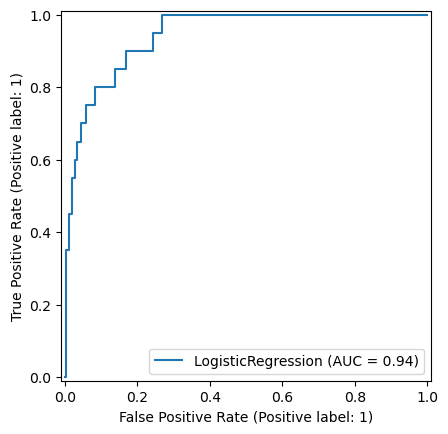

In [13]:
from sklearn.linear_model import LogisticRegression

"""
Although we use SMOTE later on.
We still want to balance the classes in the baseline model.
This is different to SMOTE, since that creates new data 
"""
lr = LogisticRegression(max_iter = 500, class_weight = "balanced")
lr.fit(x_train_sc, y_train)
evaluate_model(lr, x_test_sc, y_test)

 Accuracy: 0.871
 Precision: 0.170
Recall: 0.750
F1-Score: 0.278
 AUC Score: 0.935


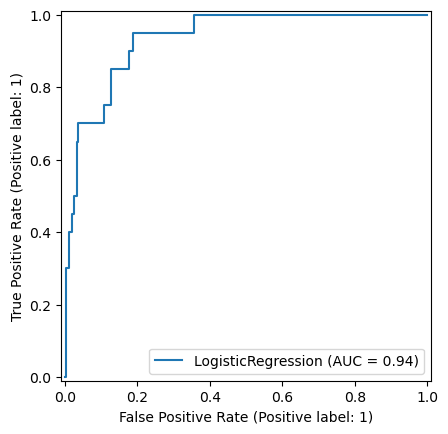

In [14]:
lr_sm = LogisticRegression(max_iter = 2000)
lr_sm.fit(x_train_sc_sm, y_train_sm)

evaluate_model(lr_sm, x_test_sc, y_test)

### 9. RandomForest
This is a ML algorithm that uses decesion trees to make better predictions. Each tree looks at a random part of the data and their results are combined. 
1. The model creates many decision trees using random parts of the data, so that every tree is a bit different. 
2. When creating a tree, it picks a few columns at random/
3. Each tree makes it own decision/ prediction.
4. the final answer is the one that the most trees agree with.  

Reference:
- https://www.geeksforgeeks.org/machine-learning/random-forest-algorithm-in-machine-learning/

Documentation:
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier


 Accuracy: 0.972
 Precision: 1.000
Recall: 0.150
F1-Score: 0.261
 AUC Score: 0.936


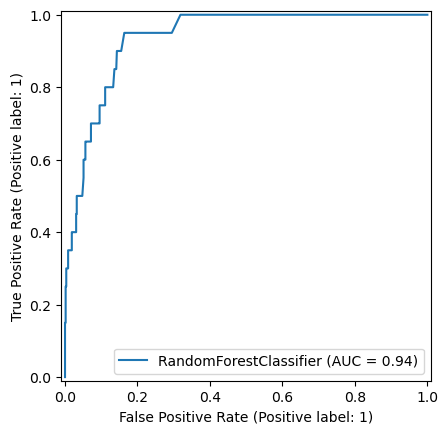

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 500, class_weight = "balanced", random_state = 42)
rf.fit(x_train_sc, y_train)
evaluate_model(rf, x_test_sc, y_test)

Interesting to see it the precision of 1. This could be due to the fact that RF predicts very little bankruptcies ( 0 - 5) and it got all of them correct.

 Accuracy: 0.962
 Precision: 0.412
Recall: 0.350
F1-Score: 0.378
 AUC Score: 0.923


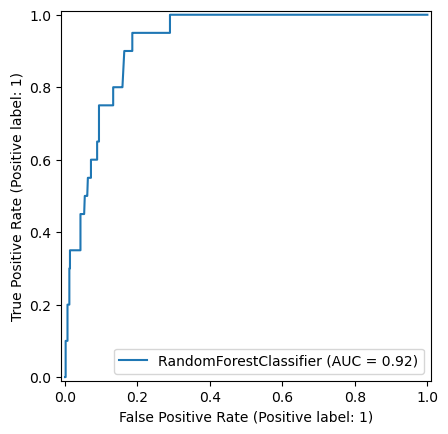

In [17]:
rf_sm = RandomForestClassifier(n_estimators = 500, random_state = 42)
rf_sm.fit(x_train_sc_sm, y_train_sm)
evaluate_model(rf_sm, x_test_sc, y_test)

### 10. XGBoost
Similar to RandomForest, it also uses decision trees. I works by creating trees sequentialy, where each new tree corrects the errors of the previous one. 
Reference:
- https://www.geeksforgeeks.org/machine-learning/xgbclassifier/

Documentation:
- https://xgboost.readthedocs.io/en/latest/index.html
- https://xgboosting.com/xgboost-configure-logloss-eval-metric

*( i had to use the help of ChatGPT for this part, because i found the documentation a bit tricky, and could not figure it out on my own)

 Accuracy: 0.979
 Precision: 0.889
Recall: 0.400
F1-Score: 0.552
 AUC Score: 0.932


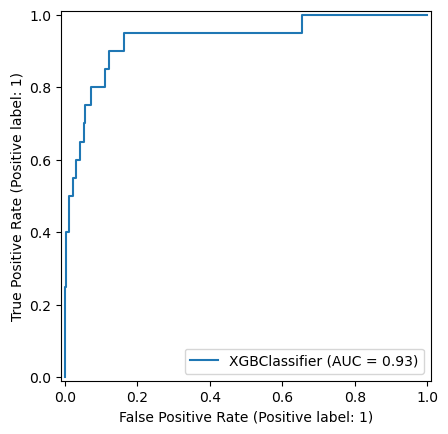

In [18]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric = "logloss", random_state = 42)
xgb.fit(x_train_sc, y_train)
evaluate_model(xgb, x_test_sc, y_test)

 Accuracy: 0.960
 Precision: 0.417
Recall: 0.500
F1-Score: 0.455
 AUC Score: 0.912


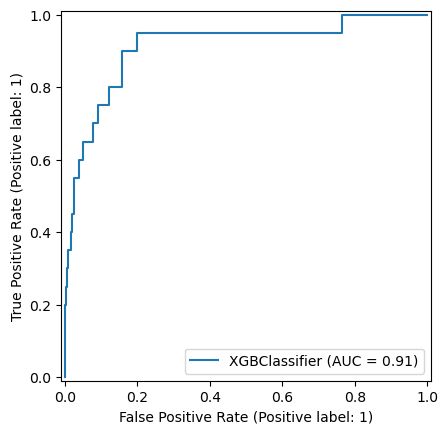

In [19]:
xgb_sm = XGBClassifier(eval_metric = "logloss", random_state = 42)
xgb_sm.fit(x_train_sc_sm, y_train_sm)
evaluate_model(xgb_sm, x_test_sc, y_test)

### 11. Feature Importance

Feature importance calculates the score for all the inputs (in our case the ratios) for a given model. As the name suggest, the score reflects the importance of each input. This is usefull for a number of reasons:
1. It allows us to understand the relationship between the target variable (bankruptcy) and the features (ratios). It helps us understand which features are important for our model.
2. It allows us to interpret our mode.

For this part we do not use SMOTE, since it creates synthetic data which are not real observations, and thus also no real economics signs. 

Reference:
- https://builtin.com/data-science/feature-importance


#### Logistic Regression

Documentation:
- https://www.geeksforgeeks.org/machine-learning/understanding-feature-importance-in-logistic-regression-models/#feature-importance-techniques-for-logistic-models

In [35]:
coefficients = lr.coef_[0]
odds_ratios = np.exp(coefficients)

coefficients_df = pd.DataFrame({
'Feature' : x.columns,
"Coefficients" : coefficients,
"Odds ratio" : odds_ratios
})

print(coefficients_df.sort_values(by="Coefficients", ascending=False))


                                              Feature  Coefficients  \
31                   current_liabilities_to_cogs_days      2.270760   
33            operating_expenses_to_total_liabilities      2.188430   
39  current_assets_minus_inventory_receivables_to_...      1.822299   
32        operating_expenses_to_shortterm_liabilities      1.682900   
47                             ebitda_to_total_assets      1.542494   
..                                                ...           ...   
62                     sales_to_shortterm_liabilities     -1.623150   
51                 shortterm_liabilities_to_cogs_days     -1.718734   
0                          net_profit_to_total_assets     -1.773992   
25                net_profit_dep_to_total_liabilities     -2.152247   
3             current_assets_to_shortterm_liabilities     -2.281756   

    Odds ratio  
31    9.686757  
33    8.921194  
39    6.186061  
32    5.381139  
47    4.676238  
..         ...  
62    0.197276  
51    0.179

#### RandomForest

Documentation:
- https://www.geeksforgeeks.org/machine-learning/feature-importance-with-random-forests/

In [25]:
fi_rf = pd.Series(rf.feature_importances_, index=x.columns).sort_values(ascending=False)

fi_rf.head(15)

operating_expenses_to_total_liabilities    0.076686
operating_profit_to_financial_expenses     0.066245
profit_on_sales_to_sales                   0.051883
profit_on_sales_to_total_assets            0.044010
operating_profit_to_sales                  0.029837
net_profit_dep_to_total_liabilities        0.029122
operating_profit_to_total_assets           0.027935
sales_to_total_assets                      0.024697
retained_earnings_to_total_assets          0.023398
equity_minus_capital_to_total_assets       0.023016
sales_growth                               0.022764
gross_profit_plus_dep_to_sales             0.022607
gross_profit_dep_to_total_liabilities      0.021886
log_total_assets                           0.021858
working_capital                            0.021844
dtype: float64

#### XGBoost

In [26]:
fi_xgb = pd.Series(xgb.feature_importances_,index=x.columns).sort_values(ascending=False)

fi_xgb.head(15)

operating_profit_to_financial_expenses     0.178845
total_liabilities_to_total_assets          0.146459
shortterm_liabilities_to_sales_days        0.044740
operating_expenses_to_total_liabilities    0.043087
equity_to_fixed_assets                     0.029725
profit_on_sales_to_sales                   0.028631
net_profit_dep_to_total_liabilities        0.027402
sales_to_inventory                         0.021399
gross_profit_plus_other_to_total_assets    0.020495
log_total_assets                           0.018315
gross_profit_to_shortterm_liabilities      0.017471
sales_minus_cogs_to_sales                  0.017222
sales_growth                               0.016448
gross_profit_plus_interest_to_sales        0.015142
working_capital_to_fixed_assets            0.014848
dtype: float32

### 12. Model Comparison

Now we can write a function to clearly display all the different results

In [27]:
results = []

def add_result(name, model):
    # evaluate the mdodel based on the previoulsy chosen metrics
    y_pred = model.predict(x_test_sc)

    # gets the predicted probability the the sample belongs to bankrupt = 1
    y_prob = model.predict_proba(x_test_sc)[:,1]

    results.append({"Model": name,"Auc": roc_auc_score(y_test, y_prob),
        "Recall": recall_score(y_test, y_pred),"Precision": precision_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred)
    })


In [28]:
add_result("Logistic regression", lr)
add_result("Logistic regression (SMOTE)", lr_sm)

add_result("RandomForest", rf)
add_result("RandomForest (SMOTE)", rf_sm)

add_result("XGBoost", xgb)
add_result("XGBoost (SMOTE)", xgb_sm)

In [29]:
results_df = pd.DataFrame(results)
results_df

,Model,Auc,Recall,Precision,F1
0,Logistic regression,0.943015,0.85,0.166667,0.278689
1,Logistic regression (SMOTE),0.935094,0.75,0.170455,0.277778
2,RandomForest,0.936286,0.15,1.000000,0.260870
3,RandomForest (SMOTE),0.923339,0.35,0.411765,0.378378
4,XGBoost,0.932368,0.40,0.888889,0.551724
5,XGBoost (SMOTE),0.912010,0.50,0.416667,0.454545


In [30]:
auc_z = roc_auc_score(y, df["Z-score"])
auc_o = roc_auc_score(y, df["O-score"])

In [32]:
results_df.loc[len(results_df)] = ["Altman Z-Score", auc_z, None, None, None]
results_df.loc[len(results_df)] = ["Ohlson O-Score", auc_o, None, None, None]

/var/folders/_t/2xhkkvpd70v6f_zb6myqk2l40000gn/T/ipykernel_99115/839500921.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df.loc[len(results_df)] = ["Altman Z-Score", auc_z, None, None, None]
/var/folders/_t/2xhkkvpd70v6f_zb6myqk2l40000gn/T/ipykernel_99115/839500921.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df.loc[len(results_df)] = ["Ohlson O-Score", auc_o, None, None, None]


In [34]:
results_df.sort_values("Auc", ascending=False)

,Model,Auc,Recall,Precision,F1
0,Logistic regression,0.943015,0.85,0.166667,0.278689
2,RandomForest,0.936286,0.15,1.000000,0.260870
1,Logistic regression (SMOTE),0.935094,0.75,0.170455,0.277778
4,XGBoost,0.932368,0.40,0.888889,0.551724
3,RandomForest (SMOTE),0.923339,0.35,0.411765,0.378378
5,XGBoost (SMOTE),0.912010,0.50,0.416667,0.454545
7,Ohlson O-Score,0.783328,NaN,NaN,NaN
6,Altman Z-Score,0.323340,NaN,NaN,NaN


### 14. Conclusion